                                - INSTITUTO SUPERIOR POLITÉCNICO CÓRDOBA - 

INTEGRANTES: CHAYLE, CHRISTIAN -
             DELGADO, AGUSTINA -
             MEDINA, JORGE

PROYECTO FINAL - RED NEURONAL (aplicar las redes neuronales a la predicción y descripción del siguiente problema)

- 10.000 clientes de un banco.
- Clientes de 3 países, edad, género, balance, productos contratados, tiene o no tarjeta de crédito, salario estimado.

Con estos datos, el banco ha marcado quienes abandonaron el banco y quienes no.
Se trata de predecir, con información similar de clientes nuevos, si abandonarán el banco o no.


In [252]:
#IMPORTAMOS LIBRERIAS 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [253]:
#IMPORTACIÓN DEL CONJUNTO DE DATOS - CLIENTES 
dataset = pd.read_csv('Clientes_banco.csv')
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [254]:
X= dataset.iloc[:,3:13].values #VARIABLES INDEPENDIENTES(predictores)
y= dataset.iloc[:,13].values #VARIABLE DEPENDIENTE(objetivo o resultado)



In [255]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [256]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [257]:
#CODIFICACIÓN DE DATOS CATEGORICOS 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])

In [258]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [259]:
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

In [260]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [261]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.compose import ColumnTransformer

#labelencoder_X_1 = LabelEncoder()
#X[:,1] = labelencoder_X_1.fit_transform(X[:,1])


#labelencoder_X_2 = LabelEncoder()
#X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

In [262]:
#labelencoder_X_2 = LabelEncoder()
#X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

In [263]:
onehotencoder = OneHotEncoder(categories ="auto")
x = onehotencoder.fit_transform(X).toarray()
x = x[:,1:]

In [264]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [265]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer([("Paises",OneHotEncoder(), [1])], remainder = 'passthrough')
#X = onehotencoder.fit_transform(x).toarray()
#X = X[:,1:]
X = ct.fit_transform(X)
X = X[:,1:]

In [266]:
X

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

In [267]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [268]:
#DIVIDIMOS LOS DATOS EN DATOS DE ENTRENAMIENTO Y DATOS DE PRUEBA

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.70, 
                                                    random_state = 0)

In [269]:
X_train

array([[1.0, 0.0, 628, ..., 1, 1, 149922.38],
       [1.0, 0.0, 554, ..., 0, 0, 24983.39],
       [0.0, 0.0, 649, ..., 1, 1, 60335.24],
       ...,
       [0.0, 0.0, 738, ..., 1, 0, 181429.87],
       [0.0, 1.0, 590, ..., 1, 1, 148750.16],
       [1.0, 0.0, 623, ..., 1, 0, 118855.26]], dtype=object)

In [270]:
X_test

array([[1.0, 0.0, 597, ..., 1, 1, 192852.67],
       [0.0, 0.0, 523, ..., 1, 0, 128702.1],
       [0.0, 1.0, 706, ..., 1, 1, 75732.25],
       ...,
       [0.0, 0.0, 629, ..., 1, 1, 23971.33],
       [0.0, 0.0, 664, ..., 0, 1, 79222.02],
       [0.0, 0.0, 813, ..., 1, 0, 33953.87]], dtype=object)

In [271]:
#AJUSTAR ESCALAS 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [272]:
X_train

array([[ 1.73978322, -0.57119169, -0.26210192, ...,  0.64998085,
         0.95692675,  0.86391904],
       [ 1.73978322, -0.57119169, -1.02784642, ..., -1.53850686,
        -1.04501206, -1.28897613],
       [-0.57478426, -0.57119169, -0.04479605, ...,  0.64998085,
         0.95692675, -0.67980819],
       ...,
       [-0.57478426, -0.57119169,  0.87616693, ...,  0.64998085,
        -1.04501206,  1.40684261],
       [-0.57478426,  1.75072575, -0.65532207, ...,  0.64998085,
         0.95692675,  0.84371985],
       [ 1.73978322, -0.57119169, -0.31384142, ...,  0.64998085,
        -1.04501206,  0.32858373]])

In [273]:
X_test

array([[ 1.73978322, -0.57119169, -0.58288678, ...,  0.64998085,
         0.95692675,  1.60367541],
       [-0.57478426, -0.57119169, -1.34863128, ...,  0.64998085,
        -1.04501206,  0.49826026],
       [-0.57478426,  1.75072575,  0.54503417, ...,  0.64998085,
         0.95692675, -0.41449351],
       ...,
       [-0.57478426, -0.57119169, -0.25175403, ...,  0.64998085,
         0.95692675, -1.30641551],
       [-0.57478426, -0.57119169,  0.11042243, ..., -1.53850686,
         0.95692675, -0.35435928],
       [-0.57478426, -0.57119169,  1.65225932, ...,  0.64998085,
        -1.04501206, -1.13440066]])

In [274]:
#Importacion de librerias
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model




In [275]:
#INICIALIZAMOS LA RED NEURONAL
red = Sequential()

In [276]:
#AQUI CREAMOS LA CAPA DE ENTRADA

red.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform',input_dim=11))


#red.add(Dense(output_dim = 6,
              #input_dim = 11,
              #init = 'uniform',
              #activation = 'relu'))

In [277]:
#PRIMER CAPA OCULTA

red.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))

#red.add(Dense(output_dim = 6, init = "uniform",activation = "relu"))

In [278]:
# SEGUNDA CAPA OCULTA
red.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))

#red.add(Dense(output_dim = 6, init = 'uniform',activation = 'relu'))

In [279]:
#CAPA DE SALIDA
red.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

#red.add(Dense(output_dim = 6, init = 'uniform',activation = 'relu'))

In [280]:

red.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])



In [281]:
red.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               1200      
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
_________________________________________________________________


In [282]:
#ENTRENAMIENTO
red.fit(X_train, y_train, batch_size=50, epochs=150)

Epoch 1/150
60/60 [==============================] - 1s 2ms/step - loss: 0.4923 - accuracy: 0.7970
Epoch 2/150
60/60 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8153
Epoch 3/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8400
Epoch 4/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8600
Epoch 5/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8640
Epoch 6/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8663
Epoch 7/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8653
Epoch 8/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8713
Epoch 9/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8750
Epoch 10/150
60/60 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8750
Epoch 11/

EVALUACIÓN DEL MODELO

In [283]:
red.evaluate(X_test, y_pred)

219/219 [==============================] - 0s 1ms/step - loss: 1.7677 - accuracy: 0.8194


[1.7676970958709717, 0.819428563117981]

In [284]:
y_pred = red.predict(X_test)
y_pred

219/219 [==============================] - 0s 1ms/step


array([[4.2144319e-01],
       [7.8388667e-03],
       [9.5956813e-05],
       ...,
       [7.7354489e-04],
       [2.9492075e-09],
       [2.1608440e-10]], dtype=float32)

In [285]:
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

==========================
=CLASIFICACIÓN DEL MODELO=
==========================

In [289]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.90      0.87      0.89      5736
        True       0.49      0.55      0.52      1264

    accuracy                           0.82      7000
   macro avg       0.69      0.71      0.70      7000
weighted avg       0.82      0.82      0.82      7000



====================
MATRIZ DE CONFUSIÓN
====================

Confusion matrix

 [[5013  571]
 [ 723  693]]

True Positives(TP) =  5013

True Negatives(TN) =  693

False Positives(FP) =  571

False Negatives(FN) =  723


<AxesSubplot:>

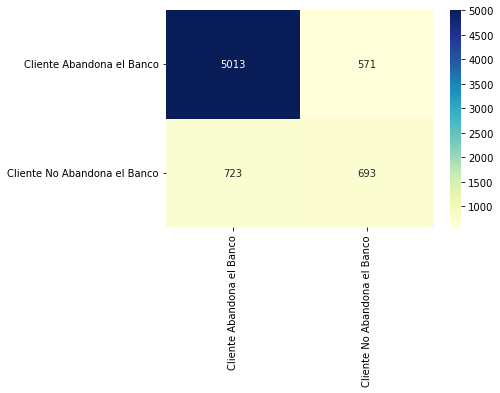

In [290]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


print('Confusion matrix\n\n', cm)
print('=================================')
print('\nTrue Positives(TP) = ', cm[0,0])
print('=================================')
print('\nTrue Negatives(TN) = ', cm[1,1])
print('=================================')
print('\nFalse Positives(FP) = ', cm[0,1])
print('=================================')
print('\nFalse Negatives(FN) = ', cm[1,0])


cm_matrix = pd.DataFrame(data=cm, columns=['Cliente Abandona el Banco', 'Cliente No Abandona el Banco'], 
                                 index=['Cliente Abandona el Banco', 'Cliente No Abandona el Banco'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')                


In [291]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      5584
           1       0.55      0.49      0.52      1416

    accuracy                           0.82      7000
   macro avg       0.71      0.69      0.70      7000
weighted avg       0.81      0.82      0.81      7000



In [295]:
red.evaluate(X_test, y_pred)


219/219 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 1.0000


[0.03589748963713646, 1.0]